In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import *
from sklearn.datasets import load_digits

In [2]:
load_digits()

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

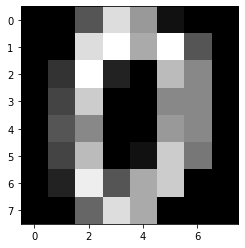

In [3]:
digits = load_digits()

plt.imshow(digits.images[0], cmap=plt.get_cmap('gray'))
plt.show()

In [4]:
#loading MNIST dataset
from tensorflow.keras.datasets import mnist
mnist.load_data()[0][0].shape

(60000, 28, 28)

In [5]:
(X_train,y_train) , (X_test,y_test)=mnist.load_data()

X_train_flat=X_train.reshape(len(X_train),28*28)
X_test_flat=X_test.reshape(len(X_test),28*28)

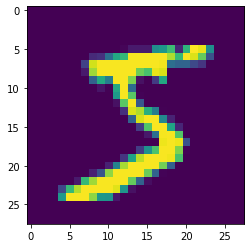

In [6]:
plt.imshow(X_train[0])

In [7]:
log = LogisticRegression()
dt = DecisionTreeClassifier()

log.fit(X_train_flat,y_train)
dt.fit(X_train_flat,y_train)

y_pred = log.predict(X_test_flat)
y_pred1 = dt.predict(X_test_flat)


print(f'Accuracy of LogisticRegression : {accuracy_score(y_test,y_pred)}')
print(f'Accuracy of DecisionTree : {accuracy_score(y_test,y_pred1)}')

C:\Users\Nihar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of LogisticRegression : 0.9255
Accuracy of DecisionTree : 0.8781


In [8]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [9]:
print(f'confusion_matrix of LogisticRegression : \n {confusion_matrix(y_test,y_pred)}')
print('\n')
print(f'confusion_matrix of DecisionTree : \n {confusion_matrix(y_test,y_pred1)}')

confusion_matrix of LogisticRegression : 
 [[ 963    0    0    3    1    3    4    4    2    0]
 [   0 1112    4    2    0    1    3    2   11    0]
 [   3   10  926   15    6    4   15    8   42    3]
 [   4    1   21  916    1   26    3    9   22    7]
 [   1    1    7    3  910    0    9    7   10   34]
 [  11    2    1   33   11  776   11    6   35    6]
 [   9    3    7    3    7   16  910    2    1    0]
 [   1    6   24    5    7    1    0  951    3   30]
 [   8    7    6   23    6   26   10   10  869    9]
 [   9    7    0   11   25    6    0   22    7  922]]


confusion_matrix of DecisionTree : 
 [[ 912    1    7    7    5   16   14    5    8    5]
 [   0 1091   12    8    1    3    5    5    6    4]
 [   8   11  871   39   13   12   13   26   25   14]
 [   5    8   31  870    5   38    5    9   18   21]
 [   3    4    9    2  867    8   14    7   22   46]
 [  10    9    6   47    9  746   22    5   22   16]
 [  12    4   11   10   18   18  851    4   23    7]
 [   2   13   24

In [10]:
print('confusion_matrix of LogisticRegression : ')
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=list(range(0,10)))



confusion_matrix of LogisticRegression : 


,0,1,2,3,4,5,6,7,8,9
0,963,0,0,3,1,3,4,4,2,0
1,0,1112,4,2,0,1,3,2,11,0
2,3,10,926,15,6,4,15,8,42,3
3,4,1,21,916,1,26,3,9,22,7
4,1,1,7,3,910,0,9,7,10,34
5,11,2,1,33,11,776,11,6,35,6
6,9,3,7,3,7,16,910,2,1,0
7,1,6,24,5,7,1,0,951,3,30
8,8,7,6,23,6,26,10,10,869,9
9,9,7,0,11,25,6,0,22,7,922


In [11]:
print('confusion_matrix of DecisionTree : ')
pd.DataFrame(confusion_matrix(y_test,y_pred1),columns=list(range(0,10)))

confusion_matrix of DecisionTree : 


,0,1,2,3,4,5,6,7,8,9
0,912,1,7,7,5,16,14,5,8,5
1,0,1091,12,8,1,3,5,5,6,4
2,8,11,871,39,13,12,13,26,25,14
3,5,8,31,870,5,38,5,9,18,21
4,3,4,9,2,867,8,14,7,22,46
5,10,9,6,47,9,746,22,5,22,16
6,12,4,11,10,18,18,851,4,23,7
7,2,13,24,18,8,3,1,931,10,18
8,9,9,32,33,17,29,19,10,785,31
9,13,4,6,19,47,13,6,18,26,857


# Logistic Regession

In [12]:
print('Logistic Regression'.center(50))
print('__'*25)
print(f'Confusion Matrix : \n {pd.DataFrame(confusion_matrix(y_test,y_pred))}')
print('_ '*25)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print('_ '*25)
print('Precision : ',precision_score(y_test,y_pred,average=None))
print('_ '*25)
print('Recall : ',recall_score(y_test,y_pred,average=None))
print('_ '*25)
print('F1 score : ',f1_score(y_test,y_pred,average=None))

               Logistic Regression                
__________________________________________________
Confusion Matrix : 
      0     1    2    3    4    5    6    7    8    9
0  963     0    0    3    1    3    4    4    2    0
1    0  1112    4    2    0    1    3    2   11    0
2    3    10  926   15    6    4   15    8   42    3
3    4     1   21  916    1   26    3    9   22    7
4    1     1    7    3  910    0    9    7   10   34
5   11     2    1   33   11  776   11    6   35    6
6    9     3    7    3    7   16  910    2    1    0
7    1     6   24    5    7    1    0  951    3   30
8    8     7    6   23    6   26   10   10  869    9
9    9     7    0   11   25    6    0   22    7  922
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Accuracy :  0.9255
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Precision :  [0.95441031 0.96779809 0.92971888 0.90335306 0.93429158 0.90337602
 0.94300518 0.93143976 0.86726547 0.91196835]
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

In [13]:
print('Logistic Regression'.center(50))
print('__'*25)
print(f'Confusion Matrix : \n {pd.DataFrame(confusion_matrix(y_test,y_pred))}')
print('_ '*25)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print('_ '*25)
print('Precision : ',precision_score(y_test,y_pred,average='macro'))
print('_ '*25)
print('Recall : ',recall_score(y_test,y_pred,average='macro'))
print('_ '*25)
print('F1 score : ',f1_score(y_test,y_pred,average='macro'))

               Logistic Regression                
__________________________________________________
Confusion Matrix : 
      0     1    2    3    4    5    6    7    8    9
0  963     0    0    3    1    3    4    4    2    0
1    0  1112    4    2    0    1    3    2   11    0
2    3    10  926   15    6    4   15    8   42    3
3    4     1   21  916    1   26    3    9   22    7
4    1     1    7    3  910    0    9    7   10   34
5   11     2    1   33   11  776   11    6   35    6
6    9     3    7    3    7   16  910    2    1    0
7    1     6   24    5    7    1    0  951    3   30
8    8     7    6   23    6   26   10   10  869    9
9    9     7    0   11   25    6    0   22    7  922
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Accuracy :  0.9255
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Precision :  0.9246626688478295
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Recall :  0.9244207693413402
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
F1 score :

In [14]:
print('Logistic Regression'.center(50))
print('__'*25)
print(f'Confusion Matrix : \n {pd.DataFrame(confusion_matrix(y_test,y_pred))}')
print('_ '*25)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print('_ '*25)
print('Precision : ',precision_score(y_test,y_pred,average='weighted'))
print('_ '*25)
print('Recall : ',recall_score(y_test,y_pred,average='weighted'))
print('_ '*25)
print('F1 score : ',f1_score(y_test,y_pred,average='weighted'))

               Logistic Regression                
__________________________________________________
Confusion Matrix : 
      0     1    2    3    4    5    6    7    8    9
0  963     0    0    3    1    3    4    4    2    0
1    0  1112    4    2    0    1    3    2   11    0
2    3    10  926   15    6    4   15    8   42    3
3    4     1   21  916    1   26    3    9   22    7
4    1     1    7    3  910    0    9    7   10   34
5   11     2    1   33   11  776   11    6   35    6
6    9     3    7    3    7   16  910    2    1    0
7    1     6   24    5    7    1    0  951    3   30
8    8     7    6   23    6   26   10   10  869    9
9    9     7    0   11   25    6    0   22    7  922
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Accuracy :  0.9255
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Precision :  0.9254726808703972
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Recall :  0.9255
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
F1 score :  0.92538271

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.87      0.89       892
           6       0.94      0.95      0.95       958
           7       0.93      0.93      0.93      1028
           8       0.87      0.89      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



# Decision tree

In [16]:
print('Decision tree'.center(50))
print('__'*25)
print(f'Confusion Matrix : \n {pd.DataFrame(confusion_matrix(y_test,y_pred1))}')
print('_ '*25)
print('Accuracy : ',accuracy_score(y_test,y_pred1))
print('_ '*25)
print('Precision : ',precision_score(y_test,y_pred1,average=None))
print('_ '*25)
print('Recall : ',recall_score(y_test,y_pred1,average=None))
print('_ '*25)
print('F1 score : ',f1_score(y_test,y_pred1,average=None))

                  Decision tree                   
__________________________________________________
Confusion Matrix : 
      0     1    2    3    4    5    6    7    8    9
0  912     1    7    7    5   16   14    5    8    5
1    0  1091   12    8    1    3    5    5    6    4
2    8    11  871   39   13   12   13   26   25   14
3    5     8   31  870    5   38    5    9   18   21
4    3     4    9    2  867    8   14    7   22   46
5   10     9    6   47    9  746   22    5   22   16
6   12     4   11   10   18   18  851    4   23    7
7    2    13   24   18    8    3    1  931   10   18
8    9     9   32   33   17   29   19   10  785   31
9   13     4    6   19   47   13    6   18   26  857
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Accuracy :  0.8781
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Precision :  [0.93634497 0.94540728 0.86323092 0.82621083 0.87575758 0.84198646
 0.89578947 0.9127451  0.83068783 0.84102061]
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

In [17]:
print('Decision tree'.center(50))
print('__'*25)
print(f'Confusion Matrix : \n {pd.DataFrame(confusion_matrix(y_test,y_pred1))}')
print('_ '*25)
print('Accuracy : ',accuracy_score(y_test,y_pred1))
print('_ '*25)
print('Precision : ',precision_score(y_test,y_pred1,average='macro'))
print('_ '*25)
print('Recall : ',recall_score(y_test,y_pred1,average='macro'))
print('_ '*25)
print('F1 score : ',f1_score(y_test,y_pred1,average='macro'))

                  Decision tree                   
__________________________________________________
Confusion Matrix : 
      0     1    2    3    4    5    6    7    8    9
0  912     1    7    7    5   16   14    5    8    5
1    0  1091   12    8    1    3    5    5    6    4
2    8    11  871   39   13   12   13   26   25   14
3    5     8   31  870    5   38    5    9   18   21
4    3     4    9    2  867    8   14    7   22   46
5   10     9    6   47    9  746   22    5   22   16
6   12     4   11   10   18   18  851    4   23    7
7    2    13   24   18    8    3    1  931   10   18
8    9     9   32   33   17   29   19   10  785   31
9   13     4    6   19   47   13    6   18   26  857
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Accuracy :  0.8781
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Precision :  0.8769181038734546
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Recall :  0.8765700662395111
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
F1 score :

In [18]:
print('Decision tree'.center(50))
print('__'*25)
print(f'Confusion Matrix : \n {pd.DataFrame(confusion_matrix(y_test,y_pred1))}')
print('_ '*25)
print('Accuracy : ',accuracy_score(y_test,y_pred1))
print('_ '*25)
print('Precision : ',precision_score(y_test,y_pred1,average='weighted'))
print('_ '*25)
print('Recall : ',recall_score(y_test,y_pred1,average='weighted'))
print('_ '*25)
print('F1 score : ',f1_score(y_test,y_pred1,average='weighted'))

                  Decision tree                   
__________________________________________________
Confusion Matrix : 
      0     1    2    3    4    5    6    7    8    9
0  912     1    7    7    5   16   14    5    8    5
1    0  1091   12    8    1    3    5    5    6    4
2    8    11  871   39   13   12   13   26   25   14
3    5     8   31  870    5   38    5    9   18   21
4    3     4    9    2  867    8   14    7   22   46
5   10     9    6   47    9  746   22    5   22   16
6   12     4   11   10   18   18  851    4   23    7
7    2    13   24   18    8    3    1  931   10   18
8    9     9   32   33   17   29   19   10  785   31
9   13     4    6   19   47   13    6   18   26  857
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Accuracy :  0.8781
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Precision :  0.8781176452894947
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Recall :  0.8781
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
F1 score :  0.87802681

In [19]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       980
           1       0.95      0.96      0.95      1135
           2       0.86      0.84      0.85      1032
           3       0.83      0.86      0.84      1010
           4       0.88      0.88      0.88       982
           5       0.84      0.84      0.84       892
           6       0.90      0.89      0.89       958
           7       0.91      0.91      0.91      1028
           8       0.83      0.81      0.82       974
           9       0.84      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

